#  Preforming Logistic Regression on Credit Data

### Step 1: Loading required librarys 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Step 2 : Loading Data

In [2]:
df=pd.read_csv("./Credit.csv")

### Step 3 : Getting breif overview of the data

In [3]:
df.head()#we have a proper index in place aldready 

,Creditability,Account_Balance,Credit_Month,Credit_History,Purpose,Credit_Amount,Value_Savings,Emp_Len,Instalmen_percent,Sex,...,Current_add,asset,age,Concurrent_Credits,Type_of_apartment,no_credits,Occupation,dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
df.info()#from this we understand that our dataset has no missing values 
#we have a 1000 rows and 21 columns ( variables ) in total.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability         1000 non-null int64
Account_Balance       1000 non-null int64
Credit_Month          1000 non-null int64
Credit_History        1000 non-null int64
Purpose               1000 non-null int64
Credit_Amount         1000 non-null int64
Value_Savings         1000 non-null int64
Emp_Len               1000 non-null int64
Instalmen_percent     1000 non-null int64
Sex                   1000 non-null int64
Guarantors            1000 non-null int64
Current_add           1000 non-null int64
asset                 1000 non-null int64
age                   1000 non-null int64
Concurrent_Credits    1000 non-null int64
Type_of_apartment     1000 non-null int64
no_credits            1000 non-null int64
Occupation            1000 non-null int64
dependents            1000 non-null int64
Telephone             1000 non-null int64
Foreign_Worker        1000 non-null int64
dtypes: int6

In [5]:
df.describe()#we have a lot of categorical variables

,Creditability,Account_Balance,Credit_Month,Credit_History,Purpose,Credit_Amount,Value_Savings,Emp_Len,Instalmen_percent,Sex,...,Current_add,asset,age,Concurrent_Credits,Type_of_apartment,no_credits,Occupation,dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [6]:
df.dtypes#we need to change the datatypes of a few variables so that they are considered as factors and not numerical values

Creditability         int64
Account_Balance       int64
Credit_Month          int64
Credit_History        int64
Purpose               int64
Credit_Amount         int64
Value_Savings         int64
Emp_Len               int64
Instalmen_percent     int64
Sex                   int64
Guarantors            int64
Current_add           int64
asset                 int64
age                   int64
Concurrent_Credits    int64
Type_of_apartment     int64
no_credits            int64
Occupation            int64
dependents            int64
Telephone             int64
Foreign_Worker        int64
dtype: object

### Step 4 : Changing the datatypes of the variables

In [7]:
A=df.columns
b=A[[0,1,3,4,6,7,9,10,12,14,15,17,19,20]]

In [8]:
for i in b:
    df.loc[:,i]=df.loc[:,i].astype('category')
df.dtypes

Creditability         category
Account_Balance       category
Credit_Month             int64
Credit_History        category
Purpose               category
Credit_Amount            int64
Value_Savings         category
Emp_Len               category
Instalmen_percent        int64
Sex                   category
Guarantors            category
Current_add              int64
asset                 category
age                      int64
Concurrent_Credits    category
Type_of_apartment     category
no_credits               int64
Occupation            category
dependents               int64
Telephone             category
Foreign_Worker        category
dtype: object

### Step 5 : Understanding our data

In [9]:
#we aldready know that our data does not contain any null values so let us try and check for any outliers 
#first in our target variable and then in the independent variables

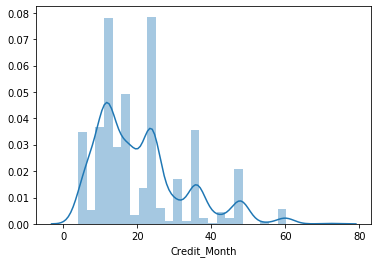

In [10]:
#let us start with our continuous variables
sc.distplot(df.Credit_Month)#skewed

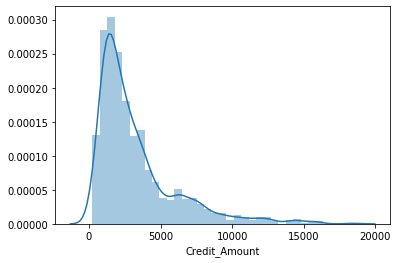

In [11]:
sc.distplot(df.Credit_Amount)#skewed

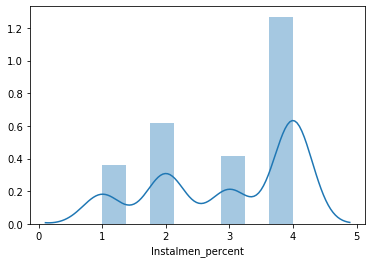

In [12]:
sc.distplot(df.Instalmen_percent)

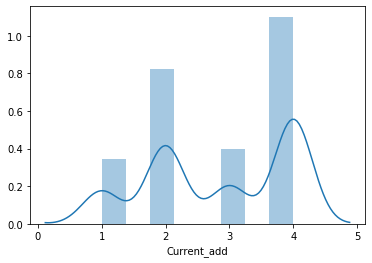

In [13]:
sc.distplot(df.Current_add)

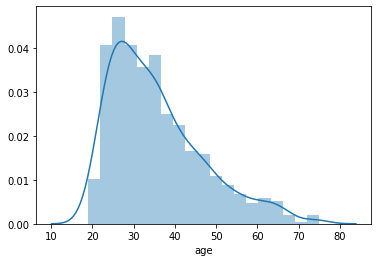

In [14]:
sc.distplot(df.age)

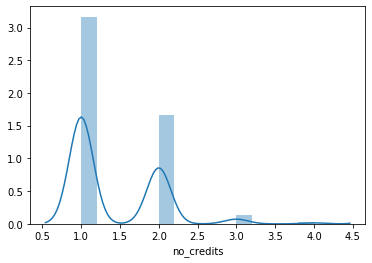

In [15]:
sc.distplot(df.no_credits)

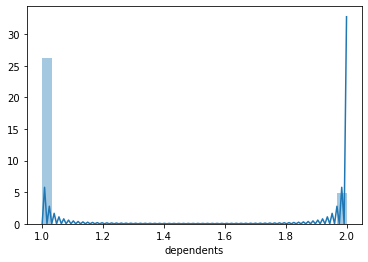

In [16]:
sc.distplot(df.dependents)

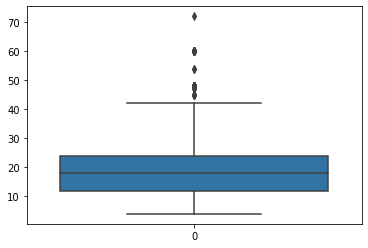

In [17]:
#building box plots for the skewed variables
sc.boxplot(data=df.Credit_Month)#this is telling us the duration in months

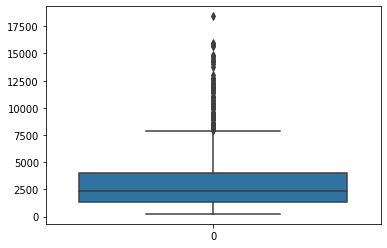

In [18]:
sc.boxplot(data=df.Credit_Amount)#credit amount

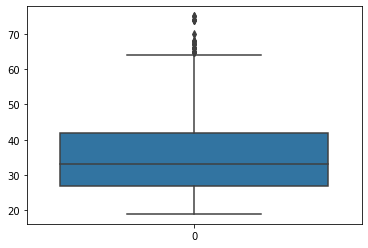

In [19]:
sc.boxplot(data=df.age)#age in years

### Step 6 : Handling outliers in Continuous variables

In [20]:
#before doing any outlier treatment we need to check a few things 
df.corr()#we can clearly see that credit month and credit amount have some sort of a strong correlation between them

,Credit_Month,Credit_Amount,Instalmen_percent,Current_add,age,no_credits,dependents
Credit_Month,1.000000,0.624988,0.074749,0.034067,-0.037550,-0.011284,-0.023834
Credit_Amount,0.624988,1.000000,-0.271322,0.028917,0.032273,0.020785,0.017144
Instalmen_percent,0.074749,-0.271322,1.000000,0.049302,0.057271,0.021669,-0.071207
Current_add,0.034067,0.028917,0.049302,1.000000,0.265626,0.089625,0.042643
age,-0.037550,0.032273,0.057271,0.265626,1.000000,0.150718,0.118589
no_credits,-0.011284,0.020785,0.021669,0.089625,0.150718,1.000000,0.109667
dependents,-0.023834,0.017144,-0.071207,0.042643,0.118589,0.109667,1.000000


In [21]:
iqr=1.5*(df.Credit_Month.quantile(0.75)-df.Credit_Month.quantile(0.25))
max_val=df.Credit_Month.quantile(0.75)+iqr
print(max_val,iqr)#this will give us the max value 

42.0 18.0


In [22]:
df[df.Credit_Month>43].shape #70 items present

(70, 21)

In [23]:
df.Creditability.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [24]:
df.loc[(df.Creditability==1)&(df.Credit_Month>43)].head()

,Creditability,Account_Balance,Credit_Month,Credit_History,Purpose,Credit_Amount,Value_Savings,Emp_Len,Instalmen_percent,Sex,...,Current_add,asset,age,Concurrent_Credits,Type_of_apartment,no_credits,Occupation,dependents,Telephone,Foreign_Worker
13,1,2,48,3,10,7582,2,1,2,3,...,4,4,31,3,2,1,4,1,2,1
62,1,4,48,4,3,3578,5,5,4,3,...,1,1,47,3,2,1,3,1,2,1
152,1,4,48,4,1,8858,5,4,2,3,...,1,4,35,3,3,2,3,1,2,1
179,1,4,48,3,3,12749,3,4,4,3,...,1,3,37,3,2,1,4,1,2,1
192,1,2,48,2,0,8487,5,4,1,2,...,2,3,24,3,2,1,3,1,1,1


In [25]:
df.loc[(df.Creditability==1)&(df.Credit_Month>43)].shape#this means that there are 30 values with creditability 1 

(30, 21)

In [26]:
df.loc[(df.Creditability==0)&(df.Credit_Month>43)].shape#this means that there are 40 values with creditability 0 
#if most had paid the loan we would have removed the outliers 0 is bad credit which is very large number of defaulters

(40, 21)

In [27]:
#checking for 
iqr=1.5*(df.Credit_Amount.quantile(0.75)-df.Credit_Amount.quantile(0.25))
max_value=df.Credit_Amount.quantile(0.75)+iqr
print(max_value,iqr)

7882.375 3910.125


In [28]:
df[df.Credit_Amount>7882].shape#72 outliers

(72, 21)

In [29]:
df[(df.Creditability==0)&(df.Credit_Amount>7882)].head()

,Creditability,Account_Balance,Credit_Month,Credit_History,Purpose,Credit_Amount,Value_Savings,Emp_Len,Instalmen_percent,Sex,...,Current_add,asset,age,Concurrent_Credits,Type_of_apartment,no_credits,Occupation,dependents,Telephone,Foreign_Worker
521,0,4,36,2,2,10974,1,1,4,2,...,2,3,26,3,2,2,4,1,2,1
600,0,1,36,2,1,8229,1,3,2,3,...,2,2,26,3,2,1,3,2,1,1
700,0,1,36,2,1,8335,5,5,3,3,...,4,4,47,3,3,1,3,1,1,1
754,0,2,6,2,0,14555,5,1,1,3,...,2,2,23,3,2,1,1,1,2,1
773,0,1,36,2,0,9271,1,4,2,3,...,1,3,24,3,2,1,3,1,2,1


In [30]:
df[(df.Creditability==0)&(df.Credit_Amount>7882)].shape#dont want to remove these outliers as well

(39, 21)

In [31]:
df[(df.Creditability==1)&(df.Credit_Amount>7882)].shape

(33, 21)

In [32]:
iqr=1.5*(df.age.quantile(0.75)-df.age.quantile(0.25))
max_val=df.age.quantile(0.75)+iqr
print(max_val,iqr)

64.5 22.5


In [33]:
df[df.age>64.5].shape#23 outliers

(23, 21)

In [34]:
df[(df.Creditability==0) & (df.age>64)].shape

(6, 21)

In [35]:
df[(df.Creditability==1) & (df.age>64)].shape

(17, 21)

In [36]:
df.corr()

,Credit_Month,Credit_Amount,Instalmen_percent,Current_add,age,no_credits,dependents
Credit_Month,1.000000,0.624988,0.074749,0.034067,-0.037550,-0.011284,-0.023834
Credit_Amount,0.624988,1.000000,-0.271322,0.028917,0.032273,0.020785,0.017144
Instalmen_percent,0.074749,-0.271322,1.000000,0.049302,0.057271,0.021669,-0.071207
Current_add,0.034067,0.028917,0.049302,1.000000,0.265626,0.089625,0.042643
age,-0.037550,0.032273,0.057271,0.265626,1.000000,0.150718,0.118589
no_credits,-0.011284,0.020785,0.021669,0.089625,0.150718,1.000000,0.109667
dependents,-0.023834,0.017144,-0.071207,0.042643,0.118589,0.109667,1.000000


In [37]:
df_new_0=df[df.Creditability==0]#bad credit
df_new_1=df[df.Creditability==1]#good credit

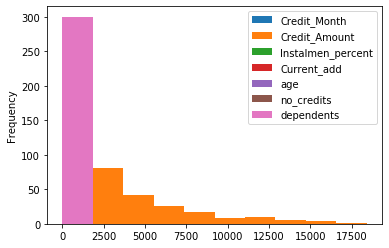

In [38]:
df_new_0.plot.hist()#We understand from here that most people who dont pay back have low credit amount

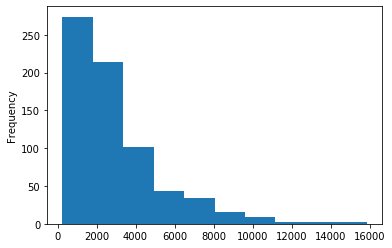

In [39]:
df_new_1.Credit_Amount.plot.hist()

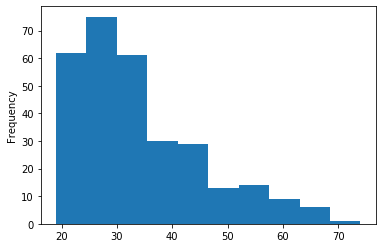

In [40]:
df_new_0.age.plot.hist()#most people who dont pay back are between the age range of 20-45

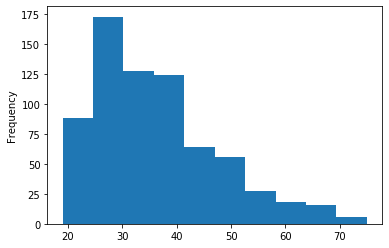

In [41]:
df_new_1.age.plot.hist()

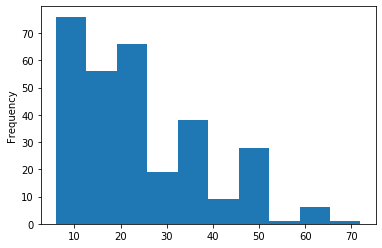

In [42]:
df_new_0.Credit_Month.plot.hist()#most people who dont pay back take loans between 5-25 months duration

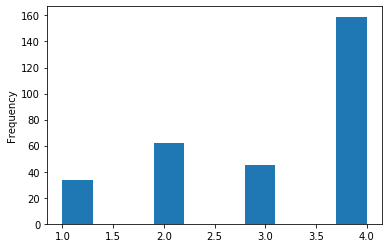

In [43]:
df_new_0.Instalmen_percent.plot.hist() #people with installment percent 4 default the highest

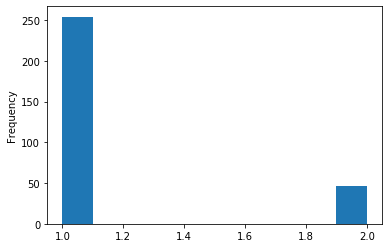

In [44]:
df_new_0.dependents.plot.hist()

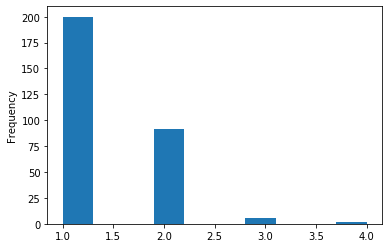

In [45]:
df_new_0.no_credits.plot.hist()#people who dont pay back when they have one loan is large

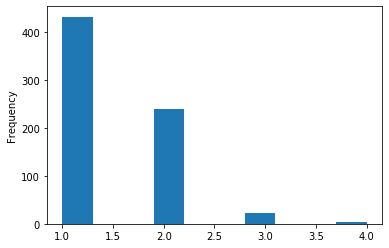

In [46]:
df_new_1.no_credits.plot.hist()

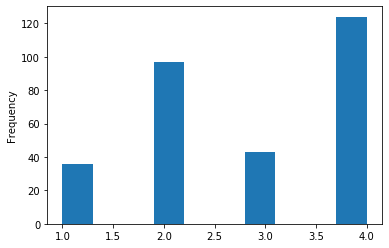

In [47]:
df_new_0.Current_add.plot.hist()

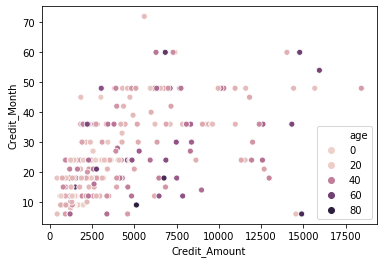

In [48]:
sc.scatterplot(x=df_new_0.Credit_Amount,y=df_new_0.Credit_Month,data=df_new_0,hue=df_new_0.age) 
#as the months increase the amount has increased and also most of the frauds will take place where the month and 
#amount is small 
#Most of the frauds were with age-groups of 20-40

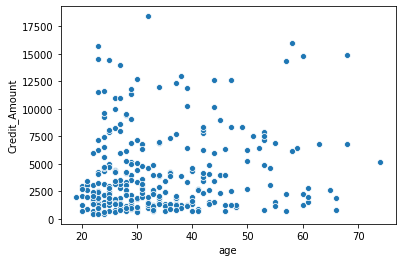

In [49]:
sc.scatterplot(x=df_new_0.age,y=df_new_0.Credit_Amount,data=df_new_0)

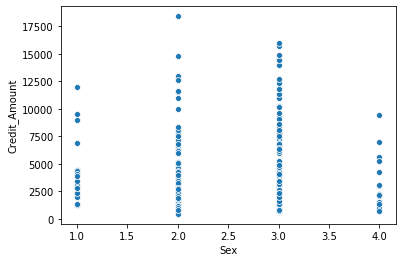

In [50]:
sc.scatterplot(x=df_new_0.Sex,y=df_new_0.Credit_Amount,data=df_new_0)

### Step 7: Working with categorical variables

In [51]:
#Foreign_worker
df.Foreign_Worker.value_counts()

1    963
2     37
Name: Foreign_Worker, dtype: int64

In [52]:
df[(df.Creditability==0)&(df.Foreign_Worker==1)].shape#296 cases of foreign workers and have not paid.

(296, 21)

In [53]:
df[(df.Creditability==0)&(df.Foreign_Worker==2)].shape#4 cases of not foreign workers and have not paid.

(4, 21)

In [54]:
#here we are going to be  using the chi square test to determine if the Foreign worker has high correlation with our 
#target variable Creditability or not.
#the null hypothesis for the chisquare test is that the two categorical variables have no relation in between them
#here as the p value > 0.05 we can reject this null hypothesis
import scipy.stats
chi2_stat,p_val,dof,ex=scipy.stats.chi2_contingency(df.loc[:,['Creditability','Foreign_Worker']])
print(chi2_stat)
print(p_val)
print(dof)
print(ex)

259.3810724617733
1.0
999
[[0.80598733 1.19401267]
 [0.80598733 1.19401267]
 [0.80598733 1.19401267]
 ...
 [0.40299367 0.59700633]
 [0.40299367 0.59700633]
 [0.40299367 0.59700633]]


In [55]:
df.columns

Index(['Creditability', 'Account_Balance', 'Credit_Month', 'Credit_History',
       'Purpose', 'Credit_Amount', 'Value_Savings', 'Emp_Len',
       'Instalmen_percent', 'Sex', 'Guarantors', 'Current_add', 'asset', 'age',
       'Concurrent_Credits', 'Type_of_apartment', 'no_credits', 'Occupation',
       'dependents', 'Telephone', 'Foreign_Worker'],
      dtype='object')

In [56]:
import scipy.stats
chi2_stat,p_val,dof,ex=scipy.stats.chi2_contingency(df.loc[:,['Creditability','Telephone']])
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
import scipy.stats
chi2_stat,p_val,dof,ex=scipy.stats.chi2_contingency(df.loc[:,['Creditability','Occupation']])
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
import scipy.stats
chi2_stat,p_val,dof,ex=scipy.stats.chi2_contingency(df.loc[:,['Creditability','Type_of_apartment']])
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
import scipy.stats
chi2_stat,p_val,dof,ex=scipy.stats.chi2_contingency(df.loc[:,['Creditability','Concurrent_Credits']])
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
import scipy.stats
chi2_stat,p_val,dof,ex=scipy.stats.chi2_contingency(df.loc[:,['Creditability','asset']])
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
import scipy.stats
chi2_stat,p_val,dof,ex=scipy.stats.chi2_contingency(df.loc[:,['Creditability','Sex']])
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
chi2_stat,p_val,dof,ex=scipy.stats.chi2_contingency(df.loc[:,['Creditability','Guarantors']])
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
chi2_stat,p_val,dof,ex=scipy.stats.chi2_contingency(df.loc[:,['Creditability','Emp_Len']])
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
chi2_stat,p_val,dof,ex=scipy.stats.chi2_contingency(df.loc[:,['Creditability','Value_Savings']])
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
chi2_stat,p_val,dof,ex=scipy.stats.chi2_contingency(df.loc[:,['Creditability','Account_Balance']])
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
chi2_stat,p_val,dof,ex=scipy.stats.chi2_contingency(df.loc[:,['Creditability','Purpose']])
print(chi2_stat)
print(p_val)
print(dof)
print(ex)

309.04052096052123
1.0
999
[[0.66539924 1.33460076]
 [0.66539924 1.33460076]
 [0.66539924 1.33460076]
 ...
 [0.66539924 1.33460076]
 [0.66539924 1.33460076]
 [0.33269962 0.66730038]]
319.0972522628874
1.0
999
[[0.77691454 3.22308546]
 [0.77691454 3.22308546]
 [0.5826859  2.4173141 ]
 ...
 [0.77691454 3.22308546]
 [0.77691454 3.22308546]
 [0.5826859  2.4173141 ]]
305.99959988144667
1.0
999
[[0.53272451 1.46727549]
 [0.53272451 1.46727549]
 [0.53272451 1.46727549]
 ...
 [0.79908676 2.20091324]
 [0.53272451 1.46727549]
 [0.53272451 1.46727549]]
320.26451935914616
1.0
999
[[0.82962963 3.17037037]
 [0.82962963 3.17037037]
 [0.82962963 3.17037037]
 ...
 [0.62222222 2.37777778]
 [0.62222222 2.37777778]
 [0.62222222 2.37777778]]
449.4457180823113
1.0
999
[[0.68672335 2.31327665]
 [0.45781557 1.54218443]
 [0.45781557 1.54218443]
 ...
 [0.91563113 3.08436887]
 [0.91563113 3.08436887]
 [0.45781557 1.54218443]]
310.8071330563541
1.0
999
[[0.62093436 2.37906564]
 [0.82791248 3.17208752]
 [0.6209343

ValueError: The internally computed table of expected frequencies has a zero element at (45, 0).

### Step 8: building a basic model

In [57]:
X=df.loc[:,['Account_Balance', 'Credit_Month', 'Credit_History',
       'Purpose', 'Credit_Amount', 'Value_Savings', 'Emp_Len',
       'Instalmen_percent', 'Sex', 'Guarantors', 'Current_add', 'asset', 'age',
       'Concurrent_Credits', 'Type_of_apartment', 'no_credits', 'Occupation',
       'dependents', 'Telephone', 'Foreign_Worker']]

In [59]:
Y=df.loc[:,['Creditability']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 147, test_size = 0.3)
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression().fit(X_train,y_train)

e:\myenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\myenv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
model1.coef_

array([[ 5.61316223e-01, -3.01900765e-02,  4.24102702e-01,
         2.76301484e-02, -4.58293218e-05,  1.74181262e-01,
         1.54500964e-01, -2.54204217e-01,  2.15523058e-02,
         2.39005336e-01, -2.91372878e-02, -2.43396755e-01,
         9.65732097e-03,  3.53266497e-02,  2.53540304e-01,
        -2.50926537e-01, -9.78118738e-02, -3.30094639e-01,
         2.09897361e-01, -1.78807125e-01]])

In [61]:
y_train_p=model1.predict(X_train)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, y_train_p)
print(cnf_matrix)
print("Acc:",metrics.accuracy_score(y_train, y_train_p))
print("Recall:",metrics.recall_score(y_train, y_train_p))
print("Pre:",metrics.precision_score(y_train, y_train_p))
print("AUC:",metrics.roc_auc_score(y_train, y_train_p))

[[108 116]
 [ 57 419]]
Acc: 0.7528571428571429
Recall: 0.8802521008403361
Pre: 0.7831775700934579
AUC: 0.6811974789915967


In [62]:
y_test_p=model1.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_test_p)
print(cnf_matrix)
print("Acc:",metrics.accuracy_score(y_test, y_test_p))
print("Recall:",metrics.recall_score(y_test, y_test_p))
print("Pre:",metrics.precision_score(y_test, y_test_p))
print("AUC:",metrics.roc_auc_score(y_test, y_test_p))

[[ 41  35]
 [ 26 198]]
Acc: 0.7966666666666666
Recall: 0.8839285714285714
Pre: 0.8497854077253219
AUC: 0.7117011278195489


In [71]:
df.dtypes

Creditability         category
Account_Balance       category
Credit_Month             int64
Credit_History        category
Purpose               category
Credit_Amount            int64
Value_Savings         category
Emp_Len               category
Instalmen_percent        int64
Sex                   category
Guarantors            category
Current_add              int64
asset                 category
age                      int64
Concurrent_Credits    category
Type_of_apartment     category
no_credits               int64
Occupation            category
dependents               int64
Telephone             category
Foreign_Worker        category
dtype: object

### Plotting categorical variables in our dataset using barplots

In [67]:
creds=df.Creditability.value_counts()

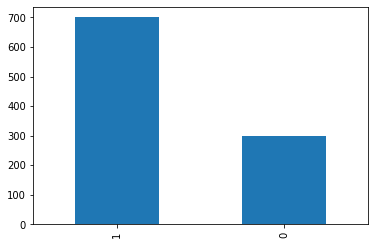

In [69]:
creds.plot.bar()

In [74]:
acc_bal=df.Account_Balance.value_counts()

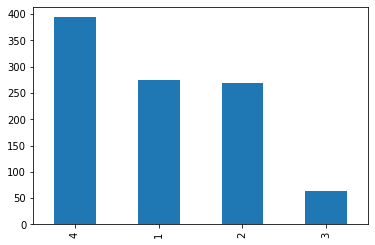

In [75]:
acc_bal.plot.bar()

In [76]:
cred_hist=df.Credit_History.value_counts()

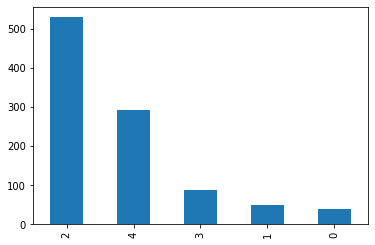

In [77]:
cred_hist.plot.bar()

In [78]:
purp=df.Purpose.value_counts()

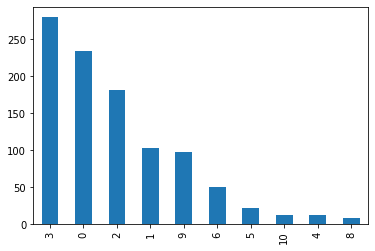

In [79]:
purp.plot.bar()

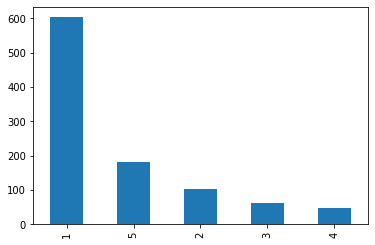

In [81]:
val_sav=df.Value_Savings.value_counts()
val_sav.plot.bar()

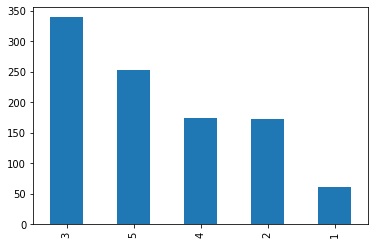

In [83]:
emp_len=df.Emp_Len.value_counts()
emp_len.plot.bar()

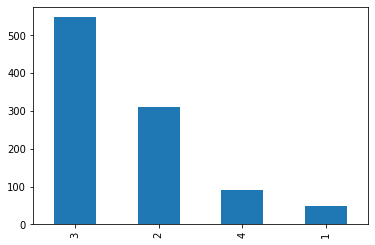

In [85]:
sex=df.Sex.value_counts()
sex.plot.bar()

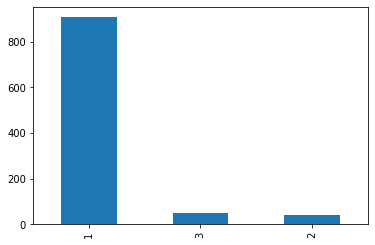

In [87]:
gur=df.Guarantors.value_counts()
gur.plot.bar()

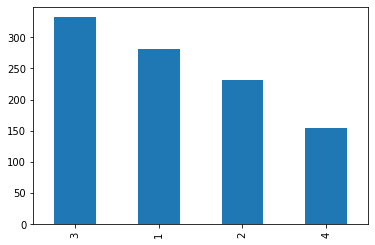

In [89]:
assets=df.asset.value_counts()
assets.plot.bar()

In [90]:
df.dtypes

Creditability         category
Account_Balance       category
Credit_Month             int64
Credit_History        category
Purpose               category
Credit_Amount            int64
Value_Savings         category
Emp_Len               category
Instalmen_percent        int64
Sex                   category
Guarantors            category
Current_add              int64
asset                 category
age                      int64
Concurrent_Credits    category
Type_of_apartment     category
no_credits               int64
Occupation            category
dependents               int64
Telephone             category
Foreign_Worker        category
dtype: object

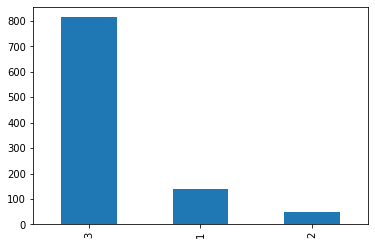

In [91]:
conc_cred=df.Concurrent_Credits.value_counts()
conc_cred.plot.bar()

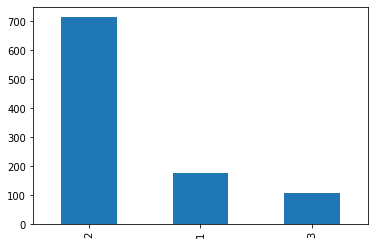

In [93]:
type_of_apt=df.Type_of_apartment.value_counts()
type_of_apt.plot.bar()

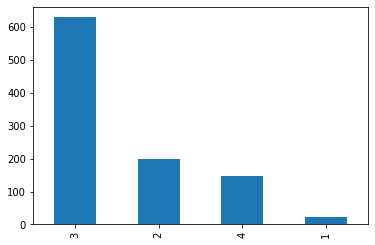

In [95]:
occp=df.Occupation.value_counts()
occp.plot.bar()

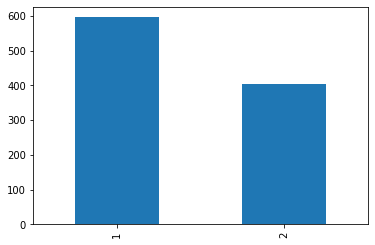

In [97]:
phone=df.Telephone.value_counts()
phone.plot.bar()

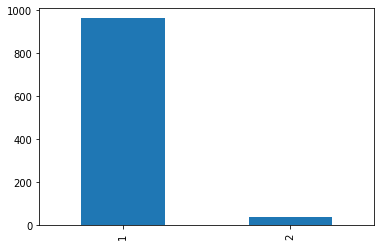

In [98]:
foreign_work=df.Foreign_Worker.value_counts()
foreign_work.plot.bar()